# RNN

This is an implementation of vanilla RNN for character-level language model. This implementation is inspired by the great [blog post](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) and lectures of Andrej Karpathy. For more details about RNNs please see references. Below you can see the math of forward pass and backward pass of simple network.

## What are RNNs?

[Recurrent neural networks (RNNs)](https://en.wikipedia.org/wiki/Recurrent_neural_network) are a type of artificial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, or numerical times series data emanating from sensors, stock markets and government agencies. These algorithms take time and sequence into account, they have a temporal dimension. 


The necessity of RNNs is raising, when our current output depends on not only from current input, but some earlier inputs also. For example if we want to predict the next character of the word, then it basically depends on all the previous characters of word, or if want to predict gold price at timestamp $t_{n}$, then typically we have to take into consideration prices at earlier k timestamps $t_{n-k}, t_{n-k+1}, ... t_{n-1}$, where k can be even greater than 100. Traditional [feedforward neural networks](https://en.wikipedia.org/wiki/Feedforward_neural_network) do not handle such cases, because they do not have so called `internal memory`. For example if we are classifiying images using feedforward neural network then this network does not care which animal picture (cat or dog) is the first input: the outputs will not be changed if we reverse the order of inputs. That is, a feedforward network has no notion of order in time, and the only input it considers is the current example it has been exposed to. Feedforward networks are amnesiacs regarding their recent past; they remember nostalgically only the formative moments of training.


Recurrent networks, on the other hand, take as their input not just the current input example they see, but also what they have perceived previously in time: they look quite similar to a traditional neural network except that a `memory-state` is added to the neurons.  Because of their internal memory, RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.

RNN architecture


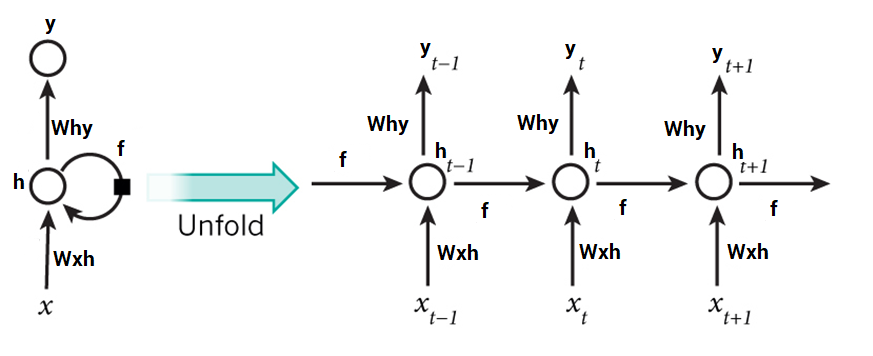

In [38]:
from IPython.display import Image
print('RNN architecture')
Image('data/forward.png')

The above picture illustrates RNN basic architecture. 

The decision a recurrent net reached at time step `t-1` affects the decision it will reach one moment later at time step `t`. So recurrent networks have two sources of input, the present and the recent past, which combine to determine how they respond to new data, much as we do in life. This feedback loop connected to their past decisions, ingesting their own outputs moment after moment as input, is sp called `internal memmory`. It keeps the information from sequence itself. That sequential information is preserved in the recurrent network’s hidden state $h_{t}$, which manages to span many time steps as it cascades forward to affect the processing of each new example. It is finding correlations between events separated by many moments, and these correlations are called “long-term dependencies”, because an event downstream in time depends upon, and is a function of, one or more events that came before. So current output $y_{t}$ depends not only from current input $x_{t}$, but also from state at current moment $h_{t}$. 

###### Mathematically

$$ h_{t} = f(W_{hh}h_{t-1} + W_{hx}x_{t}) $$

$$ y_{t} = W_{hy}h_{t} $$

Where $h_{t}$ is the state at time $t$, $x_{t}$ an exogenous input at time $t$. The final output of the network $y_{t}$ at a certain timestamp $t$ is typically computed from one or more states $h_{t-k}, h_{t-k+1} \cdots h_{t}$.


$W_{hh}$, $W_{hx}$ and $W_{hy}$  are parameters like the weights parameters in feedforward nets.

$f$ function is called activation function like for feedforward nets and can be $tanh, sigmoid, ReLU, \cdots$ . 

## RNN Training

Training a RNN is similar to training a traditional Neural Network. We also use the backpropagation algorithm, but here algorithm is more complicated. The complex part is connected with parameters sharing across all time sequence: note that $W_{hh}$, $W_{hx}$ and $W_{hy}$ are the same for all $t$ and $t-1$. Because the parameters are shared by all time steps in the network, the gradient at each output depends not only on the calculations of the current time step, but also the previous time steps. The algorithm for doing this is called [Backpropagation Through Time (BPTT)](https://en.wikipedia.org/wiki/Backpropagation_through_time).

RNN Backpropagation 


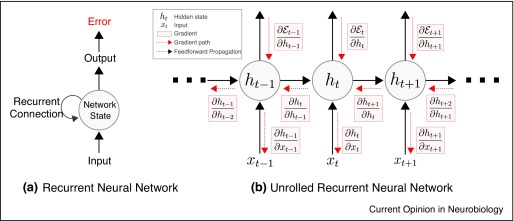

In [39]:
print('RNN Backpropagation ')
Image('data/backpropogation.jpg', height=800, width=800)

###### Mathematically

Mathematically we have to perform gradient descent, aka we have to change our model parameters $W_{hh}, W_{hx}, W_{hy}$ in a way, that loss is decreasing. So we have to calculate the following gradients:

$$ \frac{\partial J}{\partial W_{hy}}, \frac{\partial J}{\partial W_{hh}}, \frac{\partial J}{\partial W_{hx}} .$$

The total loss for a given sequence of input values $ \{x_{1}, x_{2}, \cdots, x_{T}\} $ paired with a sequence of target values $ \{ target_{1}, target_{2}, \cdots, target_{T} \} $ would then be just
the sum of the losses over all the time steps.

$$ J = \sum_{t=1}^{T} {J_{t}} $$

So we just need to calculate $ \frac{ \partial J_{t}}{\partial \theta} $ and sum for all time steps, where $ \theta $ is on of the followings $W_{hh}, W_{hx}, W_{hy}$, 

$$
\frac{ \partial J}{\partial \theta} = 
\sum_{t=1}^{T}
{\frac{\partial J_{t}}{\partial \theta}}
.
$$

###### Caluclating $ \frac{ \partial J_{t}}{\partial W_{hy}} $

If we change $ W_{hy} $ it will affect only on $ y_{t} $, so using chain rule we will have

$$
\frac{ \partial J_{t}}{\partial W_{hy}} = 
\frac{ \partial J_{t}}{\partial y_{t}} \frac{ \partial y_{t}}{\partial W_{hy}}. 
$$

######  Caluclating $ \frac{ \partial J_{t}}{\partial W_{hh}} $

If we change $ W_{hh} $ it will affect on $ h_{t} $. But please note that $ h_{t} $ is complex function from $ W_{hh} $, because $ h_{t-1} $ is also depends on $ W_{hh} $. If we continue investigation we can see that $ h_{t-1} $ itself is a complex function from $ W_{hh} $ , as we have $ h_{t-1} = f(W_{hh}h_{t-2} + W_{hx}x_{t-1}) $. With the same logic we see that if we change $ W_{hh} $, it will affect all $ h_{k} $ for all $k$ from $1$ to $t$. 

So using chain rule will have

$$
\frac{\partial J_{t}}{\partial W_{hh}} =  
\sum_{k=1}^{t}
{\frac{\partial J_{t}}{\partial h_{k}}
\frac{\partial^{+} h_{k}}{\partial W_{hh}}} = 
\sum_{k=1}^{t}
{\frac{\partial J_{t}}{\partial h_{t}}
\frac{\partial h_{t}}{\partial h_{k}} 
\frac{\partial^{+}  h_{k}}{\partial W_{hh}}}
.
$$

Please note also that using the same chain rule for $ \frac{\partial h_{t}}{\partial h_{k}} $  we will have


$$ 
\frac{\partial h_{t}}{\partial h_{k}} = \prod_{i=k+1}^{t} {\frac{\partial h_{i}}{\partial h_{i-1}}}. \\
\text{ For example for } t=4, \text{ } k=1, \text{ we will have } \\
\frac{\partial h_{4}}{\partial h_{1}} = 
\prod_{i=2}^{4} {\frac{\partial h_{i}}{\partial h_{i-1}}} = 
\frac{\partial h_{4}}{\partial h_{3}} 
\frac{\partial h_{3}}{\partial h_{2}}
\frac{\partial h_{2}}{\partial h_{1}}
.
$$

For example for $t=3$ we will have

$$
\frac{\partial J_{3}}{\partial W_{hh}} =  
\sum_{k=1}^{3}
{\frac{\partial J_{3}}{\partial h_{3}} 
\frac{\partial h_{3}}{\partial h_{k}} 
\frac{\partial^{+}  h_{k}}{\partial W_{hh}}} = 
\frac{\partial J_{3}}{\partial h_{3}}
\frac{\partial h_{3}}{\partial h_{3}}
\frac{\partial^{+}  h_{3}}{\partial W_{hh}} 
+ 
\frac{\partial J_{3}}{\partial h_{3}}
\frac{\partial h_{3}}{\partial h_{2}}
\frac{\partial^{+}  h_{2}}{\partial W_{hh}}
+
\frac{\partial J_{3}}{\partial h_{3}} 
\frac{\partial h_{3}}{\partial h_{2}}
\frac{\partial h_{2}}{\partial h_{1}} 
\frac{\partial^{+}  h_{1}}{\partial W_{hh}}
.
$$

######  Caluclating $ \frac{ \partial J_{t}}{\partial W_{hx}} $

With the very simmilar logic as for $ W_{hh} $ will have

$$
\frac{\partial J_{t}}{\partial W_{hx}} =  
\sum_{k=1}^{t}
{\frac{\partial J_{t}}{\partial h_{k}}
\frac{\partial^{+}  h_{k}}{\partial W_{hx}}} = 
\sum_{k=1}^{t}
{\frac{\partial J_{t}}{\partial h_{t}} \frac{\partial h_{t}}{\partial h_{k}} 
\frac{\partial^{+} h_{k}}{\partial W_{hx}}}
.
$$

For example for $t=3$ we will have

$$
\frac{\partial J_{3}}{\partial W_{hx}} =  
\sum_{k=1}^{3}
{\frac{\partial J_{3}}{\partial h_{3}}
\frac{\partial h_{3}}{\partial h_{k}} 
\frac{\partial^{+}  h_{k}}{\partial W_{hx}}} = 
\frac{\partial J_{3}}{\partial h_{3}} 
\frac{\partial h_{3}}{\partial h_{3}}
\frac{\partial^{+}  h_{3}}{\partial W_{hx}} 
+ 
\frac{\partial J_{3}}{\partial h_{3}}  \frac{\partial h_{3}}{\partial h_{2}} 
\frac{\partial^{+}  h_{2}}{\partial W_{hh}}
+
\frac{\partial J_{3}}{\partial h_{3}}  \frac{\partial h_{3}}{\partial h_{2}} \frac{\partial h_{2}}{\partial h_{1}} \frac{\partial^{+}  h_{1}}{\partial W_{hx}}
.
$$

**Please note that in above formulas $ \frac{\partial^{+}  h_{k}}{\partial \theta} $ refers to the
“immediate” partial derivative of the state $ h_{k} $ with respect to $\theta$, where $h_{k-1}$ is taken as a constant with respect to $\theta$.**

## Character-Level Language Models

We will train RNN character-level language models. That is, we will give the RNN a huge chunk of text and ask it to model the probability distribution of the next character in the sequence given a sequence of previous characters. This will then allow us to generate new text one character at a time.

Imagine we have a small vocabulary of four possible letters “helo”, and wanted to train an RNN on the training sequence “hello”. This training sequence is in fact a source of 4 separate training examples:

1. The probability of “e” should be likely given the context of “h”
2. “l” should be likely in the context of “he”
3. “l” should also be likely given the context of “hel”
4. “o” should be likely given the context of “hell”

Concretely, we will do one-hot-encoding for each character in our dataset and feed them into the RNN one at a time. We will then observe a sequence of 4-dimensional output vectors (one dimension per character), which we interpret as the confidence the RNN currently assigns to each character coming next in the sequence. Here’s a diagram:

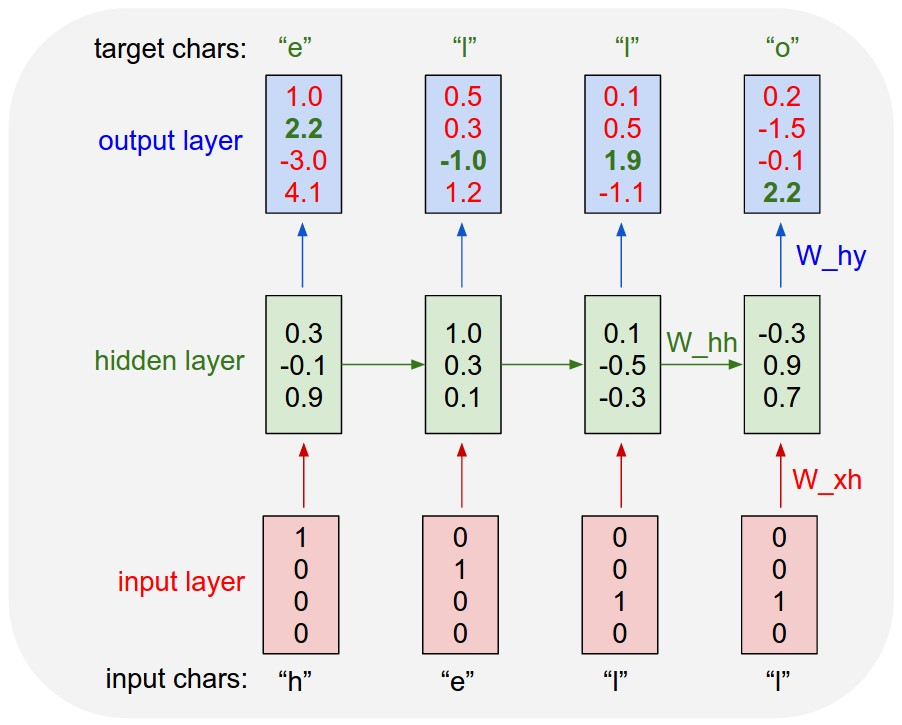

In [40]:
Image('data/charseq.jpeg')

Here we the following steps have been illustrated: 

1. Updading the hidden state using new input: $ h_{t} = \tanh(W_{hh}h_{t-1} + W_{hx}x_{t}) $
2. Getting output using hidden state: $ y_{t} = W_{hy}h_{t} $


Then we have to take into consideration also the a desired target character at every one of the 4 time steps. We would like that our network assigns a maximum confidence to that desired character. In order to do it we pass the output through softmax layer to normalize the output that allows us to express it as a probability. 

3. Passing through Softmax: $ p_{t} = softmax(y_{t}) $

The $p_{t}$ will represent the probability distribution for the next character: $p_{t}[i]$ is the probability of index $i$ being the next character at time step $t$. 

The objective of our model is to make the green numbers as big as we can and the red numbers as small as we can in the probability distribution layer. The reason is that the true index should have the highest probability by making it as close as we can to 1. The way to do that is to measure the loss using cross-entropy and then compute the gradients of the loss w.r.t. all parameters to update them in the opposite of the gradient direction. 

4. Cross Entropy loss: $ J_{t}(label_{t}, {p}_t) = - label_{t} \log p_{t} \\ J(labels, ps) = \sum_{t=1}^{T} {J_{t}} $

Here, $ label_{t}$ is the correct character at time step $t$, and $p_{t}$ is our prediction. 

Afterwards we should update parameters them in the opposite of the gradient direction. So we should calculate the loss gradient w.r.t. all parameters:  $W_{hh}, W_{hx}, W_{hy}$:

5. Calculating loss gradients w.r.t. model parameters:
$ \frac{\partial J}{\partial W_{hy}}, \frac{\partial J}{\partial W_{hh}}, \frac{\partial J}{\partial W_{hx}} $

Afterwards we should make gradient descent step.
6. Updating parameters in the opposite of the gradient direction: 
$\theta \leftarrow \theta - \alpha \cdot \frac{\partial J}{\partial \theta}$

Repeating the process over many times where each time we adjust the parameters based on the gradient direction $\rightarrow $ model will be able to correctly predict next characters given all previous ones using all names in the training text. Notice that hidden state $h$ has all past information about all characters.

## Implementation

In [41]:
from typing import Tuple, Dict, List

import numpy as np

from utils import softmax, sigmoid, tanh, relu, dsigmoid, drelu, dtanh, one_hot_encode

#### Model Parameters

* $ W_{hh} $ - hidden to hidden weight matrix, size = (hidden_size, hidden_size)
* $ W_{hx} $ - input to hidden weight matrix, size = (hidden_size, vocabulary_size)
* $ W_{hy} $ - hidden to output weight matrix, size = (vocabulary_size, hidden_size)

#### Model Hyper - Parameters

* hidden_size - the size of hidden state
* sequence length - the number of previous characters which affect on the next character
* learning rate - the small number for performing SGD
* activation function

###### Initialization

First we initialize our model with random weight matrices and with hidden state $h_{0} = [0, 0, 0, ...,0]$.

In [42]:
class RNN:
    """
    This class represents simple Recurrent Neural Network implementation for
    character-level language model. The purpose of the network is correctly predicting the next
    character, given the previous sequence of characters.
    """

    activations = {
        'tanh': (tanh, dtanh),
        'sigmoid': (sigmoid, dsigmoid),
        'relu': (relu, drelu)
    }

    def __init__(self,
                 vocabulary_size: int,
                 hidden_size: int,
                 non_linearity: str = 'tanh'):
        """
        :param vocabulary_size: the size of vocabulary, aka the number of unique characters in
                                vocabulary
        :param hidden_size: the size of hidden state
        """

        if non_linearity not in self.activations:
            raise ValueError(f'Non linearity must be one of the followings: '
                             f'{tuple(self.activations)}.')

        self.vocabulary_size = vocabulary_size
        self.hidden_size = hidden_size

        # activation function and its dervivate w.r.t. its direct input
        self.f, self.f_prime = self.activations[non_linearity]

        # randomly initializing weights

        self.w_hx = np.random.uniform(
            -np.sqrt(1. / vocabulary_size), np.sqrt(1. / vocabulary_size),
            (hidden_size, vocabulary_size)
        )

        self.w_hh = np.random.uniform(
            -np.sqrt(1. / hidden_size), np.sqrt(1. / hidden_size),
            (hidden_size, hidden_size)
        )

        self.w_hy = np.random.uniform(
            -np.sqrt(1. / hidden_size), np.sqrt(1. / hidden_size),
            (vocabulary_size, hidden_size)
        )

        # setting the current state
        self.current_state = np.zeros((self.hidden_size, 1))

###### Forward pass

Here is the implementation for forward passing. $x$ is the sequence array, where each item is the index of characters. Index is taken from our vocabulary. We make one-hot encoding of this input array and for each item in sequence make forward pass.

$ \text{for each } x_{t} \text{ in input_x}$:
   1. $ z_{t} = W_{hh}h_{t-1} + W_{hx}x_{t} $
   2. $ h_{t} = f(z_{t}) $
   3. $ y_{t} = W_{hy}h_{t} $
   4. $ p_{t} = softmax(y_{t}) $

In [43]:
def forward(self, x: np.ndarray, update_state: bool) -> Tuple[Dict, Dict]:
    """
    The basic forward pass:

    z_{t} = w_hh * h_{t-1} + w_hx * x_{t}
    h_{t} = f(z_{t})
    y_{t} = w_hy * h_{t}
    p_{t} = softmax(y_{t})

    Makes forward pass through network.
    :param x: the array of integers, where each item is the index of character, the size of
              array will be the sequence length
    :param update_state: bool, if True updates current state with last state
    :return: the tuple of states and predicted_probabilities
             states - array of states, size = (sequence length, hidden size)
             predicted_probabilities - array of predicted probabilities for each character in
                                       vocabulary, size = (sequence length, vocabulary size)
    """
    # one hot encoding of input
    inputs_matrix = one_hot_encode(x, self.vocabulary_size)

    ps, hs = {}, {}  # predicted probabilities and hidden states
    hs[-1] = self.current_state  # setting the current state
    for t in range(len(x)):
        # state at t - 1
        h_t_1 = hs[t - 1]  # dim : (self.hidden_size, 1)

        # state at t
        z_t = np.dot(self.w_hh, h_t_1) + np.dot(self.w_hx, inputs_matrix[t])
        h_t = self.f(z_t)  # dim : (self.hidden_size, 1)

        # prediction from hidden state at t
        y_t = np.dot(self.w_hy, h_t)  # unnormalized log probabilities for next chars
        p_t = softmax(y_t)  # probabilities for next chars,  dim : (self.vocabulary_size, 1)

        # updating hidden state and and predicted_probabilities keepers
        hs[t], ps[t] = h_t, p_t

    if update_state:
        self.current_state = hs[len(x) - 1]  # updating the current state
    return hs, ps

RNN.forward = forward

###### Loss

$ \text{for each } x_{t} \text{ in input_x}$:
   1. calculate the $p_{t}$ using forward pass, where $p_{t}$ is the array with size = vocabulary_size and $p_{t}[i]$ is the probability that next character will be a character from vocabulary with index $i$
   2. calculate $ J_{t} = - label_{t} \log(p_{t}) $, where $label_{t}$ is the one hot encoded array with 0s and 1, the 1 index is the correct character index in the vocabulary
  
Sum all $ J_{t} $ : $ J = \sum_{t = 1}^{T} {J_{t}} $


In [44]:
def calculate_loss(self, x: np.ndarray, labels: np.ndarray, update_state: bool) -> float:
    """
    Calculates cross entropy loss using target characters indexes and network predictions for
    all characters: loss = ∑ -label_{t} * log(predicted_probability_{t})
    """
    _, ps = self.forward(x, update_state)
    return -sum(np.log(ps[i][labels[i], 0]) for i in range(len(labels)))

RNN.calculate_loss = calculate_loss 

###### Backpropogation

Here is the most tricky part. We have to calculate loss gradient w.r.t. to model all parameters $ W_{hx}, W_{hh}, W_{hy}$. We will use the formulas defined in [RNN Training](#RNN-Training) part. We even fill go further and consider $h_{t}$  as a function of $z_{t}$.


$$
\frac{ \partial J_{t}}{\partial W_{hy}} = 
\frac{ \partial J_{t}}{\partial y_{t}} \frac{ \partial y_{t}}{\partial W_{hy}}
$$

$$
\frac{\partial J_{t}}{\partial W_{hh}} =  
\sum_{k=1}^{t}
{\frac{\partial J_{t}}{\partial h_{k}}
\frac{\partial^{+} h_{k}}{\partial W_{hh}}} = 
\sum_{k=1}^{t}
{
\frac{\partial J_{t}}{\partial h_{t}} \frac{\partial h_{t}}{\partial h_{k}} 
\frac{\partial^{+}  h_{k}}{\partial W_{hh}}
}=
\sum_{k=1}^{t}
{
\frac{\partial J_{t}}{\partial h_{t}} \frac{\partial h_{t}}{\partial z_{t}} 
\frac{\partial z_{t}}{\partial h_{k}} \frac{\partial h_{k}}{\partial z_{k}} 
\frac{\partial^{+}  z_{k}}{\partial W_{hh}}
}
$$

$$
\frac{\partial J_{t}}{\partial W_{hx}} =  
\sum_{k=1}^{t}
{\frac{\partial J_{t}}{\partial h_{k}}
\frac{\partial^{+}  h_{k}}{\partial W_{hx}}} = 
\sum_{k=1}^{t}
{\frac{\partial J_{t}}{\partial h_{t}} \frac{\partial h_{t}}{\partial h_{k}} 
\frac{\partial^{+} h_{k}}{\partial W_{hx}}}=
\sum_{k=1}^{t}
{
\frac{\partial J_{t}}{\partial h_{t}} \frac{\partial h_{t}}{\partial z_{t}} 
\frac{\partial z_{t}}{\partial h_{k}} \frac{\partial h_{k}}{\partial z_{k}} 
\frac{\partial^{+}  z_{k}}{\partial W_{hx}}
}
$$

$$
\frac{ \partial J}{\partial \theta} = 
\sum_{t=1}^{T}
{\frac{\partial J_{t}}{\partial \theta}}
$$

$$ 
\frac{\partial h_{t}}{\partial h_{k}} = \prod_{i=k+1}^{t} {\frac{\partial h_{i}}{\partial h_{i-1}}}
$$

Acording to this formulas we have to calculate also the follwoing gradients: 
$
\frac{ \partial J_{t}}{\partial y_{t}},
\frac{\partial J_{t}}{\partial h_{t}},
\frac{\partial h_{t}}{\partial z_{t}}, 
\frac{\partial z_{t}}{\partial h_{t-1}}, 
\frac{\partial^{+}  z_{t}}{\partial W_{hh}}, 
\frac{\partial^{+}  z_{t}}{\partial W_{hx}},
\frac{ \partial y_{t}}{\partial W_{hy}}
$.

1. Differentiating softmax function, we get 

$$ \frac{\partial J_{t}}{\partial y_{t}} = p_{t} - labels_{t} .$$

2. Differentiating $y_{t} = W_{hy} h_{t}$, we get

$$ \frac{\partial J_{t}}{\partial W_{hy}} = \frac{ \partial J_{t}}{\partial y_{t}} \frac{ \partial y_{t}}{\partial W_{hy}} = (p_{t} - labels_{t})h_{t} $$

$$ \frac{\partial J_{t}}{\partial h_{t}} = \frac{ \partial J_{t}}{\partial y_{t}} \frac{ \partial y_{t}}{\partial h_{t}} = (p_{t} - labels_{t})W_{hy} .$$

3. Differentiating $h_{t} = f(z_{t})$, we get

$$ 
\frac{\partial h_{t}}{\partial z_{t}} = 
\frac{\partial f}{\partial z_{t}} =
\begin{cases} 
    1 - \tanh^2{z_{t}}, & \text{ if } f = \tanh \\
    \sigma(z_{t})(1 - \sigma(z_{t})), & \text{ if } f = \sigma
\end{cases} =
\begin{cases} 
    1 - h_{t} ^ 2, & \text{ if } f = \tanh \\
    h_{t}(1 - h_{t}), & \text{ if } f = \sigma
\end{cases} $$

4. Differentiating $ z_{t} = W_{hh}h_{t-1} + W_{hx}x_{t} $, we get

$$ 
\frac{\partial z_{t}}{\partial h_{t - 1}} = W_{hh},
\text{   } 
\frac{\partial z_{t}}{\partial W_{hx}} = x_{t},
\text{   }
\frac{\partial z_{t}}{\partial W_{hh}} = h_{t - 1}.
$$


Using all these formulas we have mplemented the backward function.

In [45]:
def backward(self, x: np.ndarray, labels: np.ndarray, hs: Dict, ps: Dict):
    """
    Makes backward pass through the network. Returns the gradients of loss w.r.t. network
    parameters -  w_hx, w_hh, w_hy.

    :param x: the array of input characters, where each item is the index of character, the
              size of array will be the sequence length
    :param labels: the array of target characters, where each item is the index of character,
                   the size of array will be the sequence length
    :param hs: the hidden states of network, (the first output of the self.forward method)
    :param ps: network predictions for given inputs,
               (the second output of the self.forward method)
    :return: gradients of w_hx, w_hh, w_hy
    """
    inputs_matrix = one_hot_encode(x, self.vocabulary_size)
    labels_matrix = one_hot_encode(labels, self.vocabulary_size)

    dw_hx = np.zeros_like(self.w_hx)
    dw_hh = np.zeros_like(self.w_hh)
    dw_hy = np.zeros_like(self.w_hy)

    for t in reversed(range(len(x))):
        # dl / dy = p - label
        dy_t = ps[t] - labels_matrix[t]
       
        # dl / dw_hy = (dl / dy) * (dy / dw_hy)
        dw_hy += np.dot(dy_t, hs[t].T)
        
        # dl / dh = (dl / dy) * (dy / dh) = (p - label) * w_hy
        dh_t = np.dot(self.w_hy.T, dy_t)

        # dl / dz_{k} = (dl / dh_{k}) * (dh_{k} / dz_{k}) = dh_{t} * (dh_{k} / dz_{k})
        dz_k = dh_t * self.f_prime(hs[t])

        # dl / dw_hh = ∑ (dl / dz_{k}) * (dz_{k} / dw_hh) for all k from 1 to t
        # dl / dw_hx = ∑ (dl / dz_{k}) * (dz_{k} / dw_hx) for all k from 1 to t
        for k in reversed(range(t + 1)):
            # (dl / dz_{k}) (dz_{k} / dw_hh) = dz_k * h_{k-1}
            dw_hh += np.dot(dz_k, hs[k - 1].T)

            # (dl / dz_{k}) (dz_{k} / dw_h) = dz_k * x_{k}
            dw_hx += np.dot(dz_k, inputs_matrix[k].T)

            # updating dz_k using all previous derivatives (from t to t - k)
            # dl / dz_(k-1) = (dl / dz_{k})(dz_{k} / dh_{k-1}) * (dh_{k-1) / dz_{k-1})
            dz_k = np.dot(self.w_hh.T, dz_k) * self.f_prime(hs[k - 1])

    # clip to mitigate exploding gradients
    for d_param in (dw_hx, dw_hh, dw_hy):
        np.clip(d_param, -5, 5, out=d_param)

    return dw_hx, dw_hh, dw_hy

RNN.backward = backward

###### Gradient checking

Whenever you implement backpropagation it is good idea to also implement *gradient checking*, which is a way of verifying that your implementation is correct. The idea behind gradient checking is comparing ***analytical*** derivative with ***numerical*** derivative at some point. 

According to definition the derivative at some point is equal to 

$$\frac {\partial f} {\partial x} \big | _ {x=x_{0}} = 
\lim_{\epsilon \to 0}\frac {f(x_{0} + \epsilon) - f(x_{0} - \epsilon)} {2\epsilon}
.
$$

So the way of calculating numerical gradient is the selecting some small $\epsilon$ and approximate the limens.

Suppose we have a function $f(x) = x^2 $. We want to calculate the the gradient at point $x_{0} = 3$.

* Analytic derivative = $\frac {\partial f} {\partial x} \big | _ {x=x_{0}} = 2x| _ {x=x_{0}} = 2\cdot3 = 6$
* Numeric derivative = 
$
\frac {f(x_{0} + 0.001) - f(x_{0} - 0.001)} {2 \cdot 0.001} =
\frac {(3 + 0.001)^2 - (3 - 0.001)^2} {2 \cdot 0.001} = 5.999999999999339
$

As we see above, the difference between analytical derivative and two-sided numerical derivative is almost zero.

Below are the steps needed to implement gradient checking:

1. Pick random number of examples from training data to use it when computing both numerical and analytical gradients.

2. Initialize the network.

3. Compute forward propagation and the cross-entropy cost.

4. Compute the gradients using our back-propagation implementation.

5. Compute the numerical gradients using the two-sided epsilon method.

6. Compute the relative difference between numerical and analytical gradients.

7. If the relative difference is less than some threshold, then everythinbg is calculated correctly.


In [46]:
def calculate_numeric_gradients(self, x: np.ndarray,
                                labels: np.ndarray,
                                epsilon: float) -> Tuple:
    """
    Calculates numeric gradients w.r.t. model all parameters.

    (dL / dtheta) ≈ (L(theta + epsilon) - L(theta - epsilon)) / (2 * epsilon)

    :return: numeric gradients for dw_hx, dw_hh, dw_hy
    """
    self.reset_current_state()
    dw_hx_numeric = np.zeros_like(self.w_hx)
    dw_hh_numeric = np.zeros_like(self.w_hh)
    dw_hy_numeric = np.zeros_like(self.w_hy)

    d_params_numeric = (dw_hx_numeric, dw_hh_numeric, dw_hy_numeric)
    params = (self.w_hx, self.w_hh, self.w_hy)

    # calculating numerical gradients for each parameter
    for d_param, param in zip(d_params_numeric, params):

        # iterate over each element of the parameter matrix, e.g. (0,0), (0,1), ...
        it = np.nditer(param, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            ix = it.multi_index

            # keeping the original value so we can reset it later
            original_value = param[ix]

            # estimating numeric gradients

            # x + epsilon
            param[ix] = original_value + epsilon
            loss_plus = self.calculate_loss(x, labels, False)

            # x - epsilon
            param[ix] = original_value - epsilon
            loss_minus = self.calculate_loss(x, labels, False)

            # numeric_gradient = (f(x + delta) - f(x - delta)) / (2 * delta)
            d_param[ix] = (loss_plus - loss_minus) / (2 * epsilon)

            # resetting parameter to original value
            param[ix] = original_value

            it.iternext()

    return d_params_numeric

def gradient_check(self,
                   x: np.ndarray,
                   labels: np.ndarray,
                   epsilon: float = 1e-3,
                   threshold: float = 1e-6):
    """
    Performs gradient checking for model parameters:

     - computes the analytic gradients using our back-propagation implementation
     - computes the numerical gradients using the two-sided epsilon method
     - computes the relative difference between numerical and analytical gradients
     - checks that the relative difference is less than threshold
     - if the last check is failed, then raises an error

    """
    params = ('w_hx', 'w_hh', 'w_hy')

    # calculating the gradients using backpropagation, aka analytic gradients
    self.reset_current_state()
    hs, ps = self.forward(x, False)
    analytic_gradients = self.backward(x, labels, hs, ps)

    # calculating numerical gradients
    numeric_gradients = self.calculate_numeric_gradients(x, labels, epsilon)

    # gradient check for each parameter
    for p_name, d_analytic, d_numeric in zip(params, analytic_gradients, numeric_gradients):
        print(f"\nPerforming gradient check for parameter {p_name} "
              f"with size = {np.prod(d_analytic.shape)}.")

        if (not d_analytic.shape == d_numeric.shape or
                check_relative_difference(d_analytic, d_numeric, threshold)):
            raise ValueError(f'Gradient check for {p_name} is failed.')

        print(f"Gradient check for parameter {p_name} is passed.")
        
def reset_current_state(self):
    """Resets current state to zeros."""
    self.current_state = np.zeros((self.hidden_size, 1))

    
RNN.reset_current_state = reset_current_state
RNN.calculate_numeric_gradients = calculate_numeric_gradients
RNN.gradient_check = gradient_check

###### SGD update

The last step is updating parameters:

$$\theta \leftarrow \theta - \alpha \cdot \frac{\partial J}{\partial \theta}$$




In [47]:
def sgd_step(self, x: np.ndarray, labels: np.ndarray, lr: float):
    """
    Performs gradient descent step for model parameters: w_hx, w_hh, w_hy.

    - forward pass: calculating next char probabilities, given previous sequence of chars
    - backward pass: calculating loss and its gradient w.r.t. model params
    - sgd update: update params in the opposite of the gradient direction
    """
    hs, ps = self.forward(x, True)
    dw_hx, dw_hh, dw_hy = self.backward(x, labels, hs, ps)

    # w <-- w - lr * dloss / dw
    self.w_hx -= lr * dw_hx
    self.w_hh -= lr * dw_hh
    self.w_hy -= lr * dw_hy

RNN.sgd_step = sgd_step

###### Saving and Loading model

Here is the implementation of saving and loading model.

In [48]:
def save(self, saving_path: str):
    """Saves model."""
    params = [self.w_hx, self.w_hh, self.w_hy, self.current_state]
    np.save(saving_path, params)
    print(f'Model has been save at the following path: {saving_path}.')

@staticmethod
def load(model_path: str):
    """Loads saved model and returns it."""
    w_hx, w_hh, w_hy, current_state = np.load(model_path)
    _, vocabulary_size = w_hx.shape
    hidden_size, hidden_size = w_hh.shape
    model = RNN(vocabulary_size, hidden_size)
    model.w_hx, model.w_hh, model.w_hy, model.current_state = w_hx, w_hh, w_hy, current_state
    return model


RNN.save = save
RNN.load = load

## Refferences

For more details about RNNs:

* http://karpathy.github.io/2015/05/21/rnn-effectiveness/
* https://www.youtube.com/watch?v=iX5V1WpxxkY
* https://towardsdatascience.com/recurrent-neural-networks-and-lstm-4b601dd822a5
* https://skymind.ai/wiki/lstm#two
* http://colah.github.io/posts/2015-08-Understanding-LSTMs/
* http://blog.echen.me/2017/05/30/exploring-lstms/


For more details about Backpropagation Through Time (BPTT):

* https://arxiv.org/pdf/1610.02583.pdf
* http://willwolf.io/2016/10/18/recurrent-neural-network-gradients-and-lessons-learned-therein/
* http://proceedings.mlr.press/v28/pascanu13.pdf
* http://colah.github.io/posts/2015-08-Backprop/
* https://fdsmlhn.github.io/2017/10/22/Derivation%20of%20Back%20Propagation%20Through%20Time%20(BPTT)%20-%20Vanilla%20Recurrent%20Neural%20Network(RNN)/
